#Space X Falcon 9 First Stage Landing Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.

##Objectives

Perform exploratory Data Analysis and determine Training Labels

create a column for the class
Standardize the data
Split into training data and test data
-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

Find the method performs best using test data

In [1]:
# Importing required libraries
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # For numerical operations and arrays
import matplotlib.pyplot as plt    # For data visualization
import seaborn as sns              # For statistical visualizations

# Sklearn modules for machine learning tasks
from sklearn import preprocessing                      # For data preprocessing
from sklearn.model_selection import train_test_split   # For splitting data
from sklearn.model_selection import GridSearchCV       # For hyperparameter tuning
from sklearn.linear_model import LogisticRegression    # Logistic Regression classifier
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier        # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier     # K-Nearest Neighbors classifier

This function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [3]:
import requests
import io

# Load dataset_part_2.csv
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(url1)
data = pd.read_csv(io.BytesIO(response1.content))
print("Part 2 Dataset:")
print(data.head())

# Load dataset_part_3.csv
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
response2 = requests.get(url2)
X = pd.read_csv(io.BytesIO(response2.content))
print("\nPart 3 Dataset (first 100 rows):")
print(X.head(100))

Part 2 Dataset:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366 



Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [4]:
# Create a Pandas Series from the 'Class' column, then convert it to a NumPy array
Y = data['Class'].to_numpy()

In [5]:
# Apply standardization to the features in X
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

X_train, X_test, Y_train, Y_test

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [7]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.

In [8]:
Y_test.shape

(18,)


Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [9]:
# Create logistic regression model object
logreg = LogisticRegression()

# Define hyperparameter grid
parameters = {"C":[0.01, 0.1, 1, 10, 100], "solver":['lbfgs', 'liblinear']}

# Create GridSearchCV object
logreg_cv = GridSearchCV(logreg, parameters, cv=10)

# Fit the GridSearchCV to the training data
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']})

In [10]:
print("Best parameters:", logreg_cv.best_params_)
print("Best cross-validation score:", logreg_cv.best_score_)

Best parameters: {'C': 0.01, 'solver': 'lbfgs'}
Best cross-validation score: 0.8464285714285713




Calculate the accuracy on the test data using the method score:

In [11]:
# Calculate accuracy on the test set
logreg_test_accuracy = logreg_cv.score(X_test, Y_test)

print("Test set accuracy: {:.2f}".format(logreg_test_accuracy))

Test set accuracy: 0.83


Lets look at the confusion matrix:

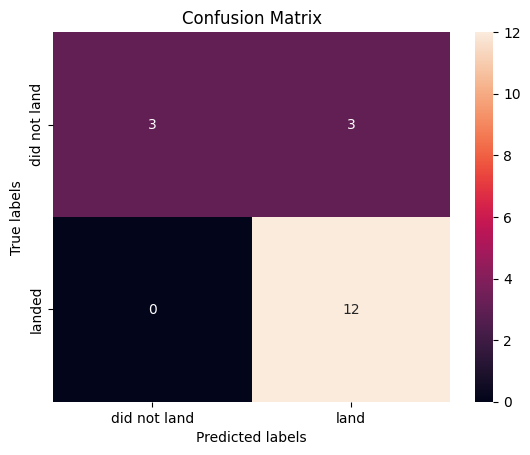

In [12]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

In [13]:
# Create the SVM object
svm = SVC()

# Example parameter grid (replace this with your actual parameters dictionary if different)
parameters = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create the GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object on the training data to find the best parameters
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'kernel': 'linear'}
accuracy : 0.8625



Calculate the accuracy on the test data using the method score:

In [15]:
accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333333333334


We can plot the confusion matrix

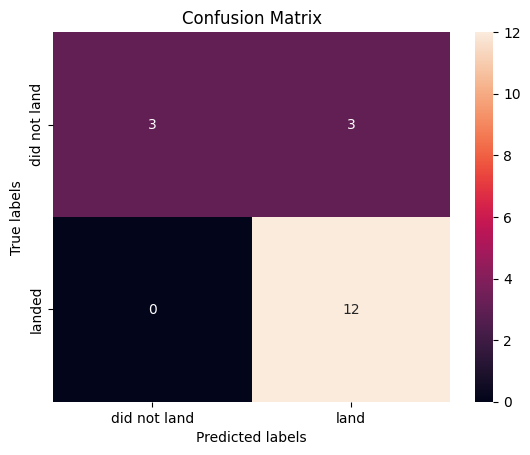

In [16]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [17]:
# Create the Decision Tree classifier object
tree = DecisionTreeClassifier()

# Define the parameters dictionary for tuning (example parameters)
parameters = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with cv=10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object on training data
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [18]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
accuracy : 0.8714285714285713



Calculate the accuracy of tree_cv on the test data using the method score:

In [19]:
accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Test Accuracy: {accuracy:.4f}")

Decision Tree Test Accuracy: 0.7778


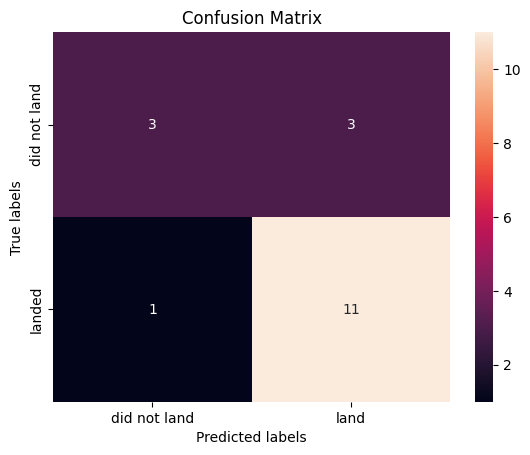

In [20]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [21]:
# Create the KNN object
knn = KNeighborsClassifier()

# Define your parameters dictionary, for example:
parameters = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Create the GridSearchCV object with cv=10
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the model to the training data
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [22]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
accuracy : 0.8464285714285713




Calculate the accuracy of knn_cv on the test data using the method score:

In [23]:
knn_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", knn_accuracy)

KNN Test Accuracy: 0.8333333333333334


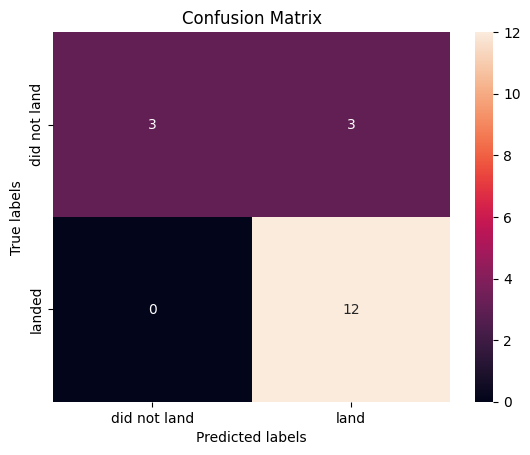

In [24]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Find the method performs best:

In [25]:
# Assuming you have these accuracy variables from previous tasks
logreg_accuracy = logreg_cv.score(X_test, Y_test)
svm_accuracy = svm_cv.score(X_test, Y_test)
tree_accuracy = tree_cv.score(X_test, Y_test)
knn_accuracy = knn_cv.score(X_test, Y_test)

# Create a dictionary of model names and their accuracies
accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Decision Tree': tree_accuracy,
    'K-Nearest Neighbors': knn_accuracy
}

# Find the model with the highest accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"The best performing model is {best_model} with an accuracy of {best_accuracy:.4f}")


The best performing model is Logistic Regression with an accuracy of 0.8333


In [26]:
len(X_test)

18

In [27]:
svm_cv.best_params_['kernel']


'linear'

In [28]:
tree_cv.score(X_test, Y_test) * 100


77.77777777777779